# Exercises: Types and Multiple Dispatch

## Adding a method

The function below adds any number to any other number.

In [1]:
function add(x::Number, y::Number)
    x + y
end

add (generic function with 1 method)

The word add could have other meanings as well. Write a method of the add function that takes two strings and adds the
second to the end of the first.

So if called with "Hello " and "World!", the function returns "Hello World!".

In [ ]:
function add(x::String, y::String)
    x*y
end
add("Hello ", "World!")

How do you check what methods the function now has?

In [ ]:
methods(add)

Now create another method for the add function. This time the first argument is an array and the second is a number.

The function returns a new array with the number added to the end of the original array.

In [ ]:
function add(x::Array, y::Number)
    push!(x, y)
end
add([1,2,3], 4)

## Structs

### Fruit Bowl

Write functions to keep track of fruit in your fruit bowl and to warn you when it's empty or if no more fruit will fit in. For simplicity, assume a given number of fruit will fit not matter the kind.

To get started, create a new type for a piece of fruit. The fruit can be either an apple, a banana or an orange. (You can add others based on your preference.)

You can use the @enum to represent types of fruit.

In [ ]:
@enum Fruit apple banana orange

Now create a mutable type called FruitBowl. It contains a list of fruit in the bowl and the maximum capacity of the bowl (integer).

In [ ]:
mutable struct FruitBowl
    contents::Array{Fruit}
    capacity::Integer
end

Now create an `add!`-function to add a piece of fruit to the bowl. Check that the bowl does not go over capacity.

In [ ]:
function add!(bowl::FruitBowl, fruit::Fruit)
    if length(bowl.contents) >= bowl.capacity
        println("It rolls off!")
    else
        push!(bowl.contents, fruit)
    end
end

In [ ]:
# Test it with an empty bowl
bowl = FruitBowl([], 4)
add!(bowl, apple)

In [ ]:
# Keep adding untill the bowl is full
add!(bowl, apple)
add!(bowl, banana)
add!(bowl, orange) 
add!(bowl, orange) # This one does not fit

## The simulation and duck typing

You might have noticed that the simulation on the first page has some dark blue cells at the beginning. These cells are immune. We did not have any immune cells in the notebook, though. Let's add this final piece to the program.

The cell below will load the simulation as we left it.

In [1]:
include("../../epidemic_no_immunity.jl")

update!

Write a new cell type called where the `status` of a cell can be `immune` in addition to the states we had before.

In [2]:
@enum InfectionStatus uninfected infected dead recovered immune

mutable struct Cell
    status::InfectionStatus
    infection_time::Int8
end

Modify the loop below to make roughly 20% of the cells immune.

In [3]:
# About 20% of the cells should be immune
immunity_rate = 0.2

# Create an array of cells, with each cell undefined at first
cells = Array{Cell}(undef, 32, 32)

# Now loop over the positions in the array and create either an
# uninfected cell or an immune cell
for i in 1:size(cells)[1]
    for j in 1:size(cells)[2]
        if rand(1)[1] < immunity_rate
            cells[i,j] = Cell(immune, 0)
        else
            cells[i,j] = Cell(uninfected, 0)
        end
    end
end

# Infect one cell at the start
cells[16,16].status = infected

infected::InfectionStatus = 1

We don't need to change the `update!`, since only `uninfected` cells can get infected. We can just run the simulation and thanks to duck-typing, everything works.

In [4]:
parameters = Parameters(0.2, 0.001, 8, 0.1)
update!(cells, parameters)

Plotting does not work immediately, however. Since `to_colors` does not know about immune cells, it will not return anything for them.

Update to_colors function below to use a different color for immune cells.

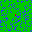

In [5]:
"Map the cells to colors for plotting"
function to_colors(cell)
    if cell.status == uninfected
        return RGB(0.0,0.8,0.0)
    end
    if cell.status == infected
        return RGB(0.8,0.0,0.0)
    end
    if cell.status == dead
        return RGB(0.1,0.1,0.1)
    end
    if cell.status == recovered
        return RGB(0.0,0.0,0.8)
    end
    if cell.status == immune
        return RGB(0.2,0.2,1.0)
    end
end

to_colors.(cells)